## 📘 Notebook Section: Basic Plotting for Stock Summary

## Step 1: Market Capitalization Distribution
We first want to understand the overall distribution of company sizes.  
This plot will show how market caps (in crores) vary across all companies.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the final cleaned dataset with dates
df = pd.read_csv("../data/cleaned/indstock_summary_cleaned.csv")

df.head()


,priority,symbol,identifier,open,high,low,last_price,prev_close,change,perc_change,...,near_week_low,perc_change_365d,date_365d_ago,chart_365d_path,date_30d_ago,perc_change_30d,chart_30d_path,chart_today_path,series,meta
0,1,NIFTY 50,NIFTY 50,24818.85,24832.35,24621.6,24741.00,24734.3,6.70,0.03,...,-13.784944,-1.61,2024-09-05,https://nsearchives.nseindia.com/365d/NIFTY-50...,2025-08-06,0.68,https://nsearchives.nseindia.com/30d/NIFTY-50.svg,https://nsearchives.nseindia.com/today/NIFTY-5...,NaN,NaN
1,0,EICHERMOT,EICHERMOTEQN,6449.00,6598.50,6440.5,6580.00,6425.0,155.00,2.41,...,-45.938453,37.09,2024-09-05,https://nsearchives.nseindia.com/365d/EICHERMO...,2025-08-06,16.10,https://nsearchives.nseindia.com/30d/EICHERMOT...,https://nsearchives.nseindia.com/today/EICHERM...,EQ,"{'symbol': 'EICHERMOT', 'companyName': 'Eicher..."
2,0,M&M,M&MEQN,3511.00,3577.80,3481.5,3562.90,3481.5,81.40,2.34,...,-46.923711,30.78,2024-09-05,https://nsearchives.nseindia.com/365d/M&M-EQ.svg,2025-08-06,10.34,https://nsearchives.nseindia.com/30d/M&M-EQ.svg,https://nsearchives.nseindia.com/today/M&MEQN.svg,EQ,"{'symbol': 'M&M', 'companyName': 'Mahindra & M..."
3,0,SHRIRAMFIN,SHRIRAMFINEQN,589.00,596.00,585.6,595.65,585.8,9.85,1.68,...,-20.735786,-81.74,2024-09-05,https://nsearchives.nseindia.com/365d/SHRIRAMF...,2025-08-06,-6.04,https://nsearchives.nseindia.com/30d/SHRIRAMFI...,https://nsearchives.nseindia.com/today/SHRIRAM...,EQ,"{'symbol': 'SHRIRAMFIN', 'companyName': 'Shrir..."
4,0,MARUTI,MARUTIEQN,14740.00,14957.00,14701.0,14903.00,14662.0,241.00,1.64,...,-38.955711,21.11,2024-09-05,https://nsearchives.nseindia.com/365d/MARUTI-E...,2025-08-06,18.93,https://nsearchives.nseindia.com/30d/MARUTI-EQ...,https://nsearchives.nseindia.com/today/MARUTIE...,EQ,"{'symbol': 'MARUTI', 'companyName': 'Maruti Su..."


###  Plot To Show Top 10 Companies By Market Cap

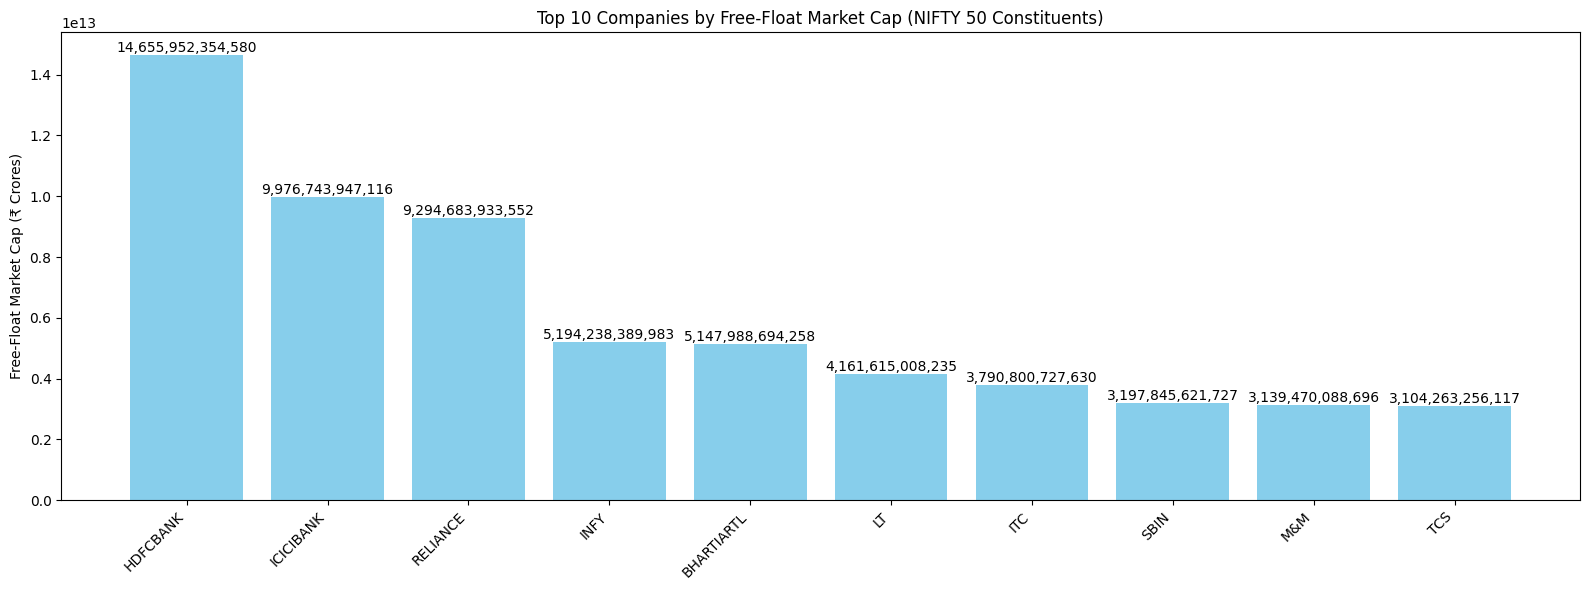

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# OPTIONAL: Load your data if not already loaded
# df = pd.read_csv("../data/cleaned/indstock_summary_cleaned.csv")

# ✅ Step 1: Exclude index-level rows (like 'NIFTY 50')
df_companies = df[df["symbol"] != "NIFTY 50"]

# ✅ Step 2: Get the top 10 companies by FFMC
top10_ffmc = df_companies.nlargest(10, "ffmc")

# ✅ Step 3: plot the top 10 companies by FFMC
plt.figure(figsize=(16, 6))
bars = plt.bar(top10_ffmc["symbol"], top10_ffmc["ffmc"], color="skyblue")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Free-Float Market Cap (₹ Crores)")
plt.title("Top 10 Companies by Free-Float Market Cap (NIFTY 50 Constituents)")

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()





###  Plot To Show Top 10 Companies By Market Cap (Lakh Crores Rupees)

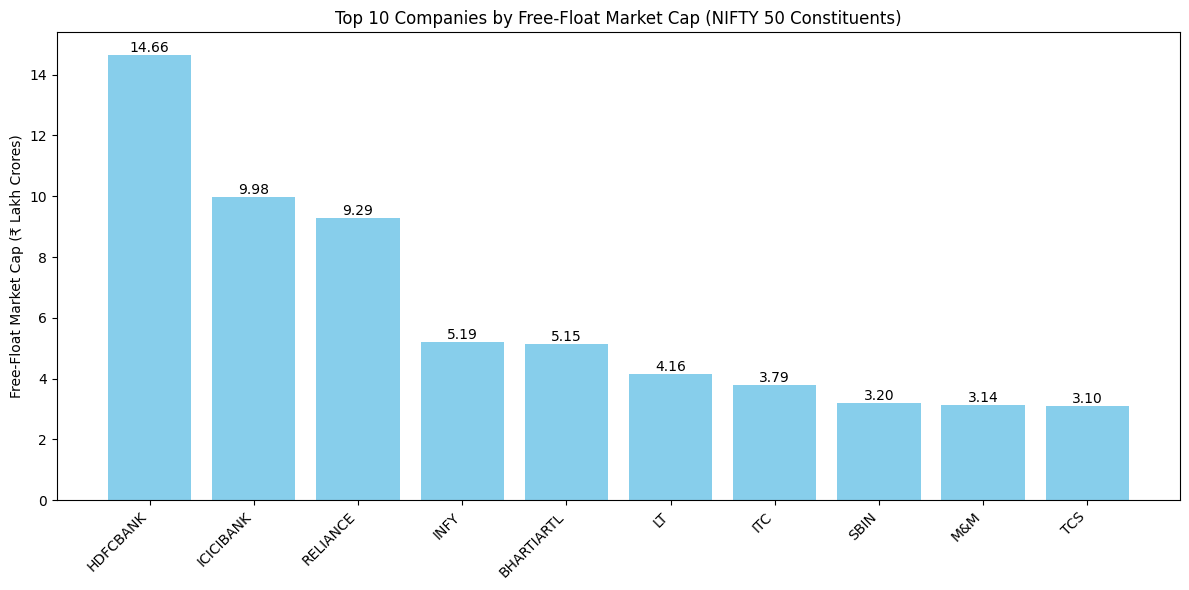

In [3]:
import matplotlib.pyplot as plt

# Convert FFMC into ₹ lakh crores
top10_ffmc["ffmc_scaled"] = top10_ffmc["ffmc"] / 1e12  # Convert to lakh crores

plt.figure(figsize=(12, 6))
bars = plt.bar(top10_ffmc["symbol"], top10_ffmc["ffmc_scaled"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Free-Float Market Cap (₹ Lakh Crores)")
plt.title("Top 10 Companies by Free-Float Market Cap (NIFTY 50 Constituents)")

# Add shorter value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', 
             va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## Step 2: Top 10 Companies by Market Cap (Horizontal Bar chart)
We sort companies by market cap and display the top 10 in a horizontal bar chart.  
This quickly shows market leaders in the index.


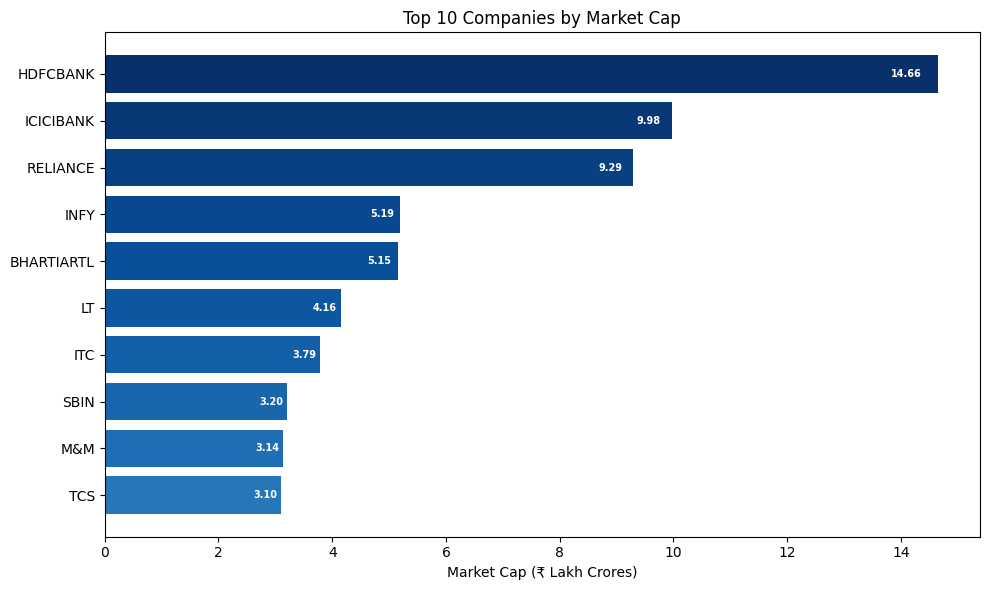

In [7]:
import matplotlib.pyplot as plt
# ✅ Load main and metadata tables
df_summary = pd.read_csv("../data/cleaned/indstock_summary_cleaned.csv")
df_meta = pd.read_csv("../data/cleaned/indstock_metadata_cleaned.csv")


# ✅ Step 1: Get Top 10 companies by market cap
top10 = df.nlargest(10, "ffmc")

# ✅ Step 2: Scale market cap to lakh crores
top10["ffmc"] = top10["ffmc"] / 1e12

# ✅ Step 3: Merge summary table with metadata (on symbol)
df_merged = pd.merge(df_summary, df_meta[["symbol", "industry"]], on="symbol", how="left")

# ✅ Step 4: Group by industry using Free-Float Market Cap (ffmc)
industry_ffmc = df_merged.groupby("industry")["ffmc"].sum().sort_values(ascending=True)
industry_ffmc_lakhcr = industry_ffmc / 1e12

# ✅ Step 5: Generate gradient colors
colors = plt.cm.Blues(np.linspace(1, 0.1, len(industry_ffmc_lakhcr)))

# ✅ Step 6: Plot horizontal bar chart
plt.figure(figsize=(10,6))
bars = plt.barh(top10["symbol"], top10["ffmc"], color=colors)



plt.xlabel("Market Cap (₹ Lakh Crores)")
plt.title("Top 10 Companies by Market Cap")
plt.gca().invert_yaxis()  # Largest at top

# ✅ Step 4: Add labels (clean & short)
for bar in bars:
    width = bar.get_width()
    label = f"{width:.2f}"
   
    if width > industry_ffmc_lakhcr.max() * 0.1:  # threshold: 10% of max value
        # Large bar → put text inside in white
        plt.text(width - (width * 0.02), bar.get_y() + bar.get_height()/2,
                 label, va='center', ha='right', fontsize=7, color="white", fontweight="bold")
    else:
        # Small bar → put text outside in black
        plt.text(width + (industry_ffmc_lakhcr.max() * 0.01), 
                 bar.get_y() + bar.get_height()/2,
                 label, va='center', ha='left', fontsize=7, color="black")

plt.tight_layout()
plt.show()


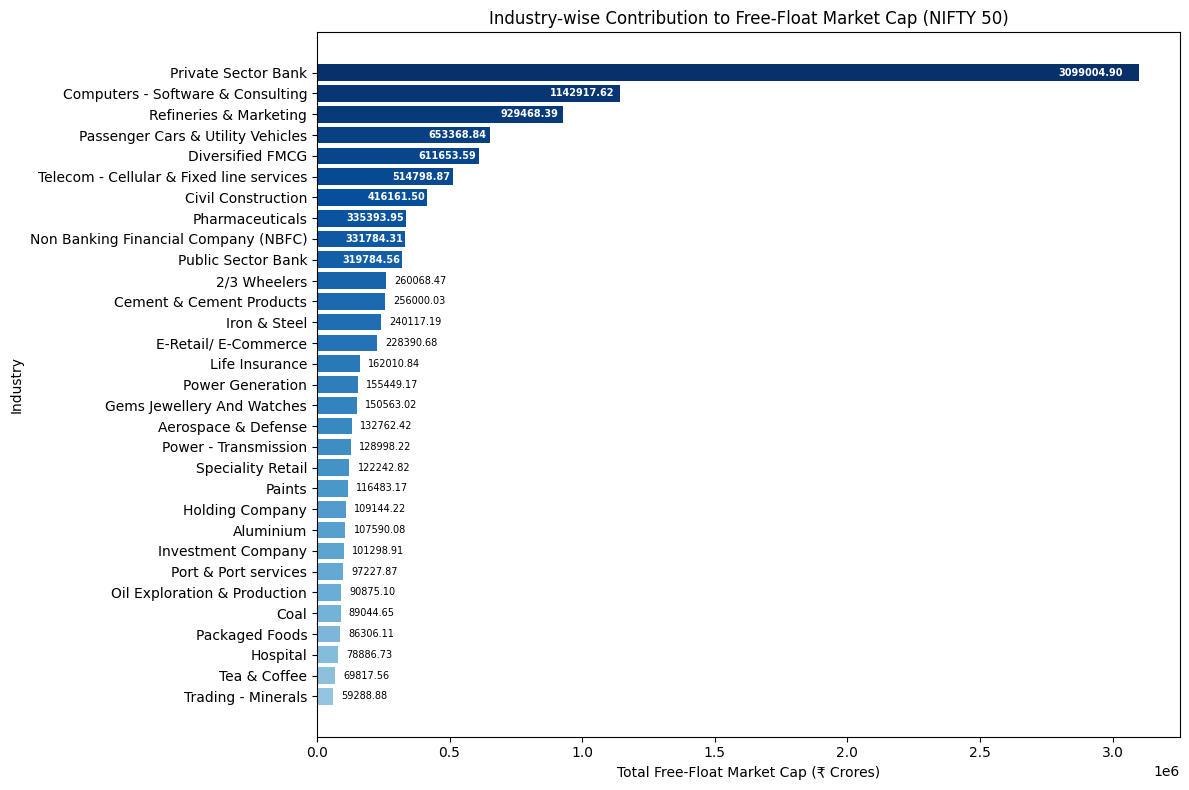

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# ✅ Load main and metadata tables
df_summary = pd.read_csv("../data/cleaned/indstock_summary_cleaned.csv")
df_meta = pd.read_csv("../data/cleaned/indstock_metadata_cleaned.csv")

# ✅ Step 1: Merge summary table with metadata (on symbol)
df_merged = pd.merge(df_summary, df_meta[["symbol", "industry"]], on="symbol", how="left")

# ✅ Step 2: Group by industry using Free-Float Market Cap (ffmc)
industry_ffmc = df_merged.groupby("industry")["ffmc"].sum().sort_values(ascending=True)

# ✅ Step 3: Convert to ₹ lakh crores
industry_ffmc_lakhcr = industry_ffmc / 1e7

# ✅ Step 4: Generate gradient colors
colors = plt.cm.Blues(np.linspace(0.4, 1, len(industry_ffmc_lakhcr)))

# ✅ Step 5: Plot horizontal bar chart
plt.figure(figsize=(12,8))
bars = plt.barh(industry_ffmc_lakhcr.index, industry_ffmc_lakhcr.values, color=colors)

plt.xlabel("Total Free-Float Market Cap (₹ Crores)")
plt.ylabel("Industry")
plt.title("Industry-wise Contribution to Free-Float Market Cap (NIFTY 50)")

# ✅ Step 6: Add smart labels (inside if wide enough, else outside)
for bar in bars:
    width = bar.get_width()
    label = f"{width:.2f}"
    
    if width > industry_ffmc_lakhcr.max() * 0.1:  # threshold: 10% of max value
        # Large bar → put text inside in white
        plt.text(width - (width * 0.02), bar.get_y() + bar.get_height()/2,
                 label, va='center', ha='right', fontsize=7, color="white", fontweight="bold")
    else:
        # Small bar → put text outside in black
        plt.text(width + (industry_ffmc_lakhcr.max() * 0.01), 
                 bar.get_y() + bar.get_height()/2,
                 label, va='center', ha='left', fontsize=7, color="black")

plt.tight_layout()
plt.show()


### Step 4: Distribution of Daily % Change
To measure volatility, we plot the histogram of daily percentage change across companies.  
This highlights whether most companies are gaining or losing on the given day.


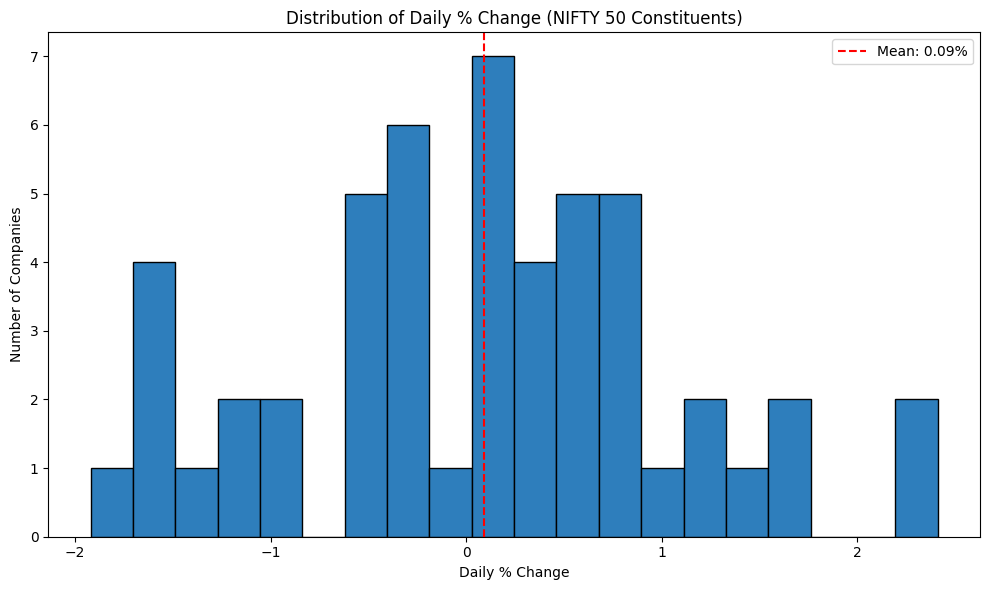

In [21]:
import matplotlib.pyplot as plt

# ✅ Plot histogram of Daily % Change
plt.figure(figsize=(10,6))

shade = plt.cm.Blues(0.70)
plt.hist(df["perc_change"], bins=20, edgecolor="black", color=shade)

plt.xlabel("Daily % Change")
plt.ylabel("Number of Companies")
plt.title("Distribution of Daily % Change (NIFTY 50 Constituents)")

plt.axvline(df["perc_change"].mean(), color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {df['perc_change'].mean():.2f}%")
plt.legend()

plt.tight_layout()
plt.show()


### Step 5: Companies with Highest Trading Volumes
We identify the companies with the highest daily trading volume.  
This indicates investor interest and liquidity in the market.


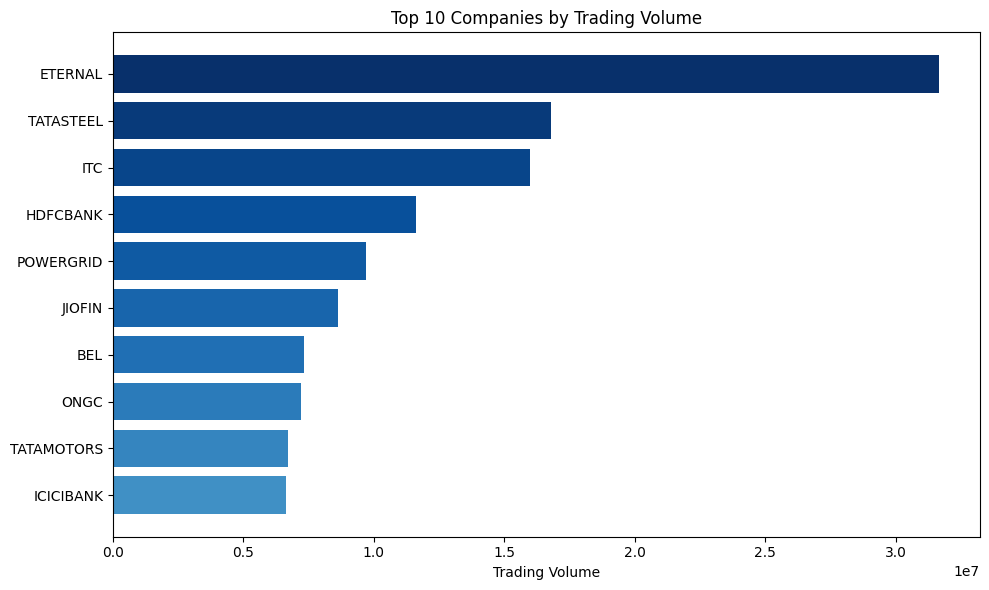

In [29]:
import matplotlib.pyplot as plt

# ✅ Step 1: Exclude NIFTY 50 index row
df_companies = df[df["symbol"] != "NIFTY 50"]

# ✅ Step 2: Get top 10 companies by Trading Volume
top_volume = df_companies.nlargest(10, "volume")

# ✅ Step 3: Set the shade of blue for gradient (0.0 = light, 1.0 = dark)
colors = plt.cm.Blues(np.linspace(1, -1.0))

# ✅ Step 4: Plot
plt.figure(figsize=(10,6))


plt.barh(top_volume["symbol"], top_volume["volume"], color=colors)

plt.xlabel("Trading Volume")
plt.title("Top 10 Companies by Trading Volume")

plt.gca().invert_yaxis()  # biggest volume at top
plt.tight_layout()
plt.show()



### Step 6: Industry Composition
We will analyze the number of companies in each industry. This helps us see which sectors dominate the stock market universe.

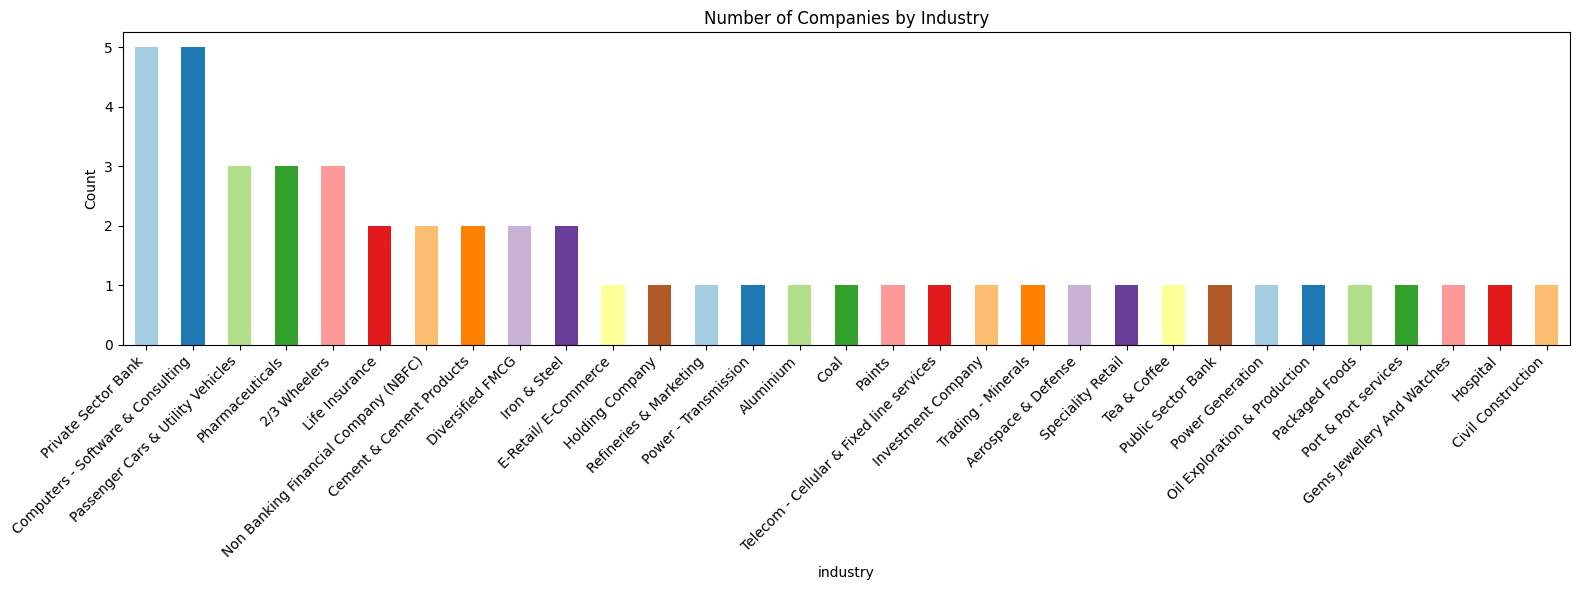

In [31]:
industry_counts = df_meta["industry"].value_counts()

plt.figure(figsize=(16,6))
industry_counts.plot(kind="bar", color=plt.cm.Paired.colors)
plt.title("Number of Companies by Industry")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Step 7: Industry-wise Average % Change
Now we analyze the average daily % change across industries to identify outperforming and underperforming sectors.

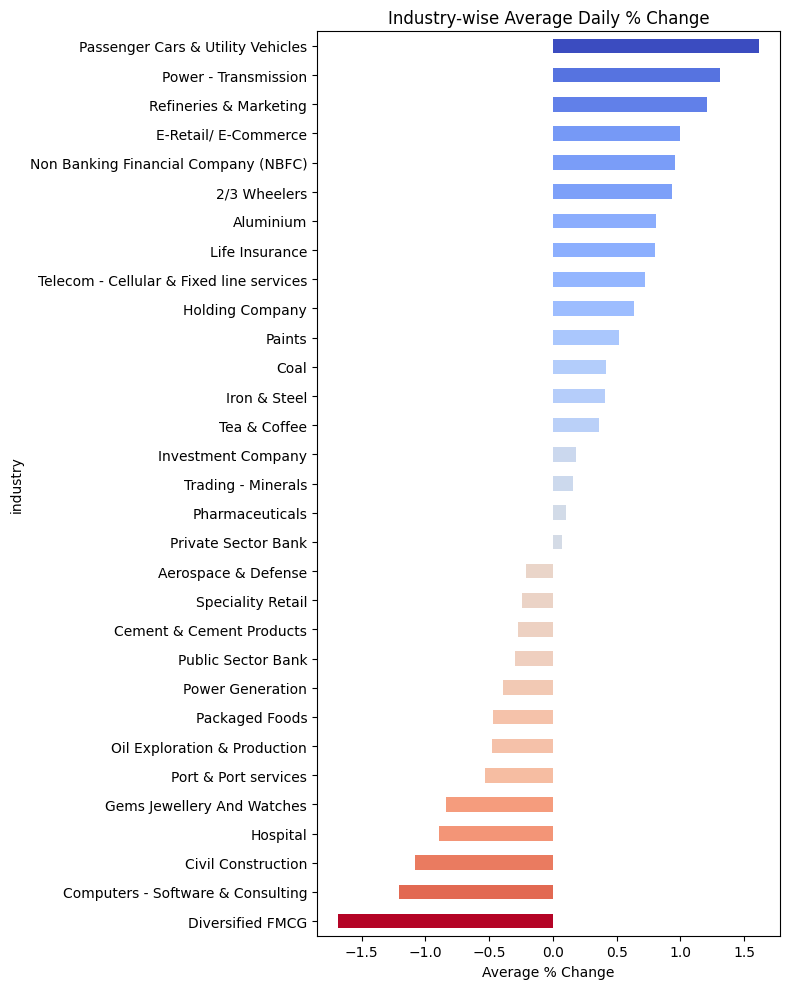

In [35]:
merged = df.merge(df_meta[["symbol","industry"]], on="symbol", how="left")
industry_change = merged.groupby("industry")["perc_change"].mean().sort_values()

plt.figure(figsize=(8,10))
industry_change.plot(kind="barh", color=plt.cm.coolwarm_r((industry_change - industry_change.min()) /
                                                      (industry_change.max()-industry_change.min())))
plt.xlabel("Average % Change")
plt.title("Industry-wise Average Daily % Change")
plt.tight_layout()
plt.show()


### Step 8: Market Cap vs Volume (Bubble Plot)
We can compare market size vs liquidity. Larger bubbles represent bigger % changes, while color shows gain/loss.

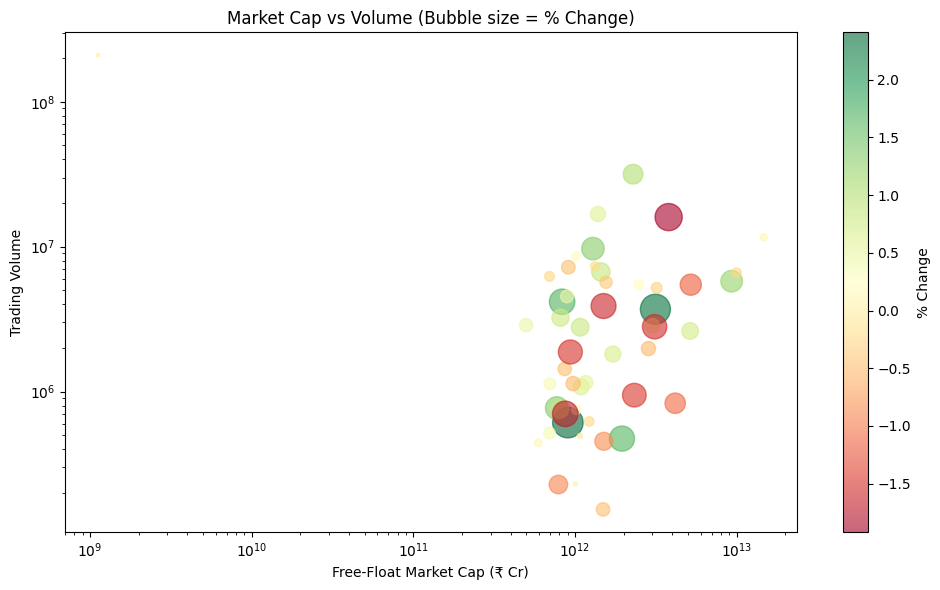

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(df["ffmc"], df["volume"], s=df["perc_change"].abs()*200, alpha=0.6, c=df["perc_change"], cmap="RdYlGn")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Free-Float Market Cap (₹ Cr)")
plt.ylabel("Trading Volume")
plt.title("Market Cap vs Volume (Bubble size = % Change)")
plt.colorbar(label="% Change")
plt.tight_layout()
plt.show()


### Step 9: IPO Trends (Listings by Year)
Number of companies listed each year from metadata.

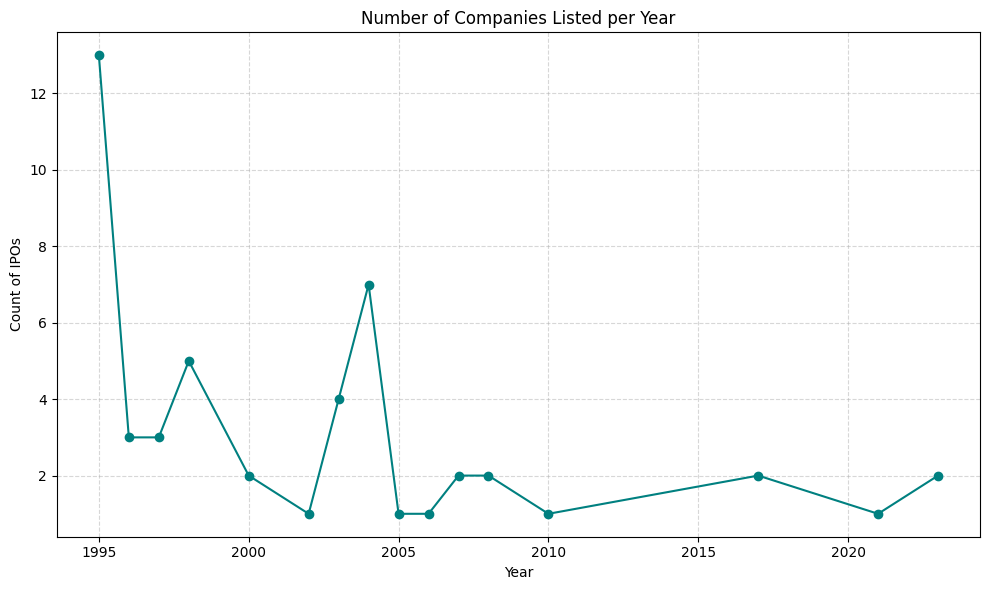

In [45]:
df_meta["listing_date"] = pd.to_datetime(df_meta["listing_date"], errors="coerce")
ipo_trend = df_meta["listing_date"].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,6))
ipo_trend.plot(kind="line", marker="o", color="teal")
plt.title("Number of Companies Listed per Year")
plt.xlabel("Year")
plt.ylabel("Count of IPOs")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### Step 10: Industry-wise Market Share (Pie Chart)
Market cap contribution of top industries.

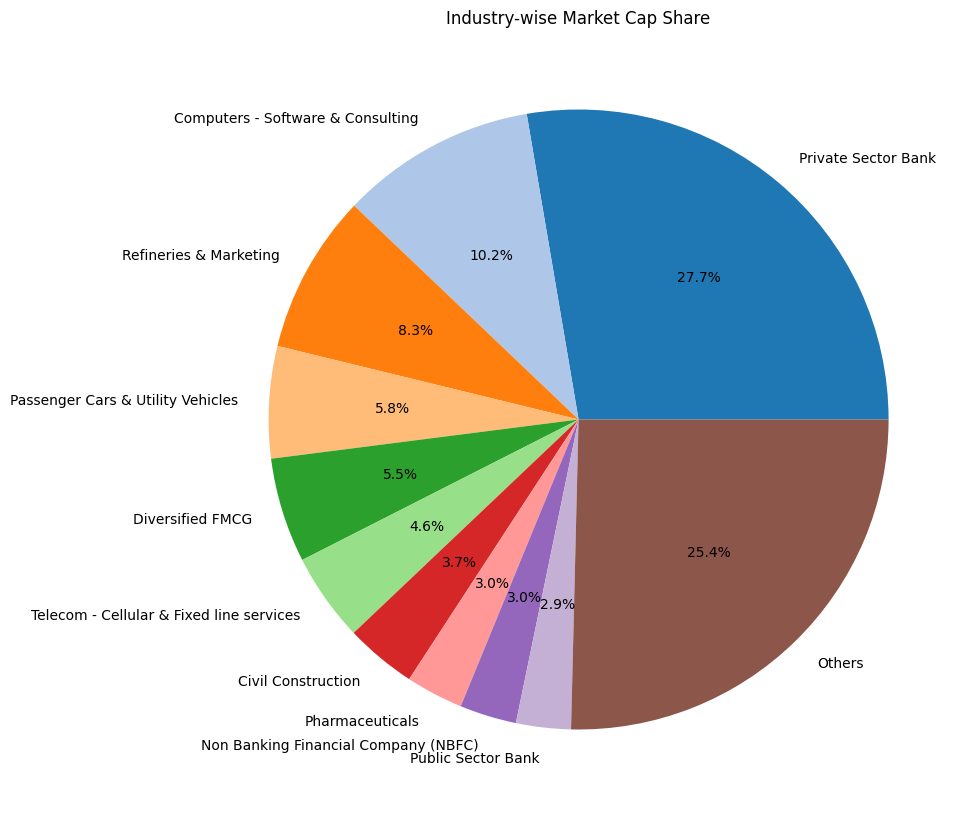

In [49]:
industry_mcap = merged.groupby("industry")["ffmc"].sum()
top10 = industry_mcap.nlargest(10)
others = industry_mcap.sum() - top10.sum()

plt.figure(figsize=(10,18))
plt.pie(list(top10.values)+[others], labels=list(top10.index)+["Others"],
        autopct="%1.1f%%", colors=plt.cm.tab20.colors)
plt.title("Industry-wise Market Cap Share")
plt.show()


### Step 11: Volatility Distribution (Boxplot by Industry)

Check how volatile different industries are.

<Figure size 1200x600 with 0 Axes>

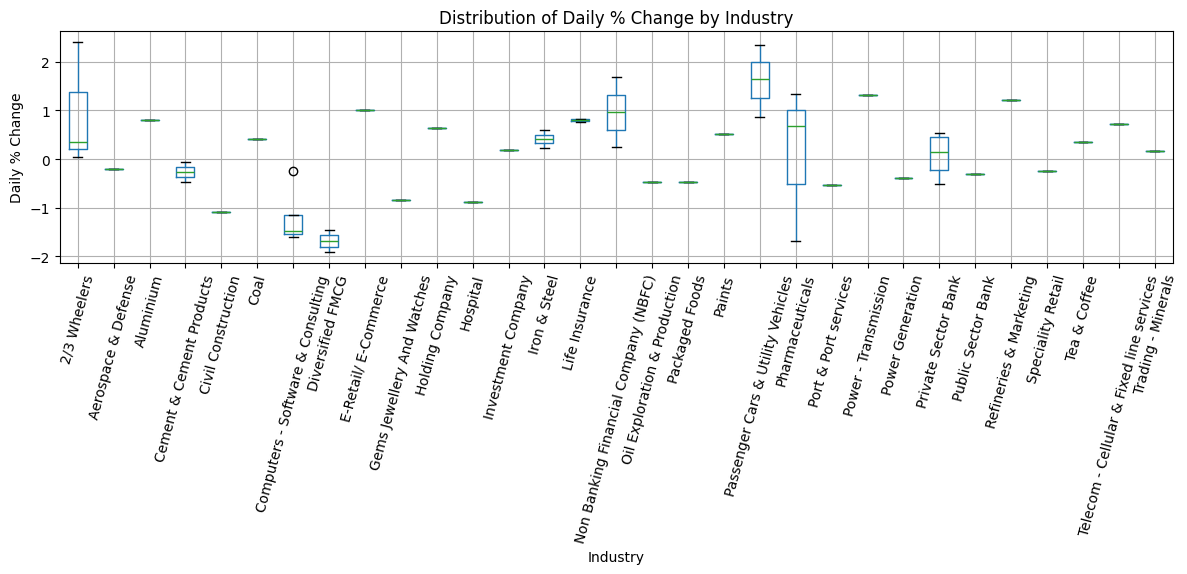

In [55]:
plt.figure(figsize=(12,6))
merged.boxplot(column="perc_change", by="industry", rot=75, figsize=(12,6))
plt.title("Distribution of Daily % Change by Industry")
plt.suptitle("")  # remove default subtitle
plt.xlabel("Industry")
plt.ylabel("Daily % Change")
plt.tight_layout()
plt.show()


### Step 12: Correlation Heatmap of Stock Metrics

Relationships between price, volume, and market cap.

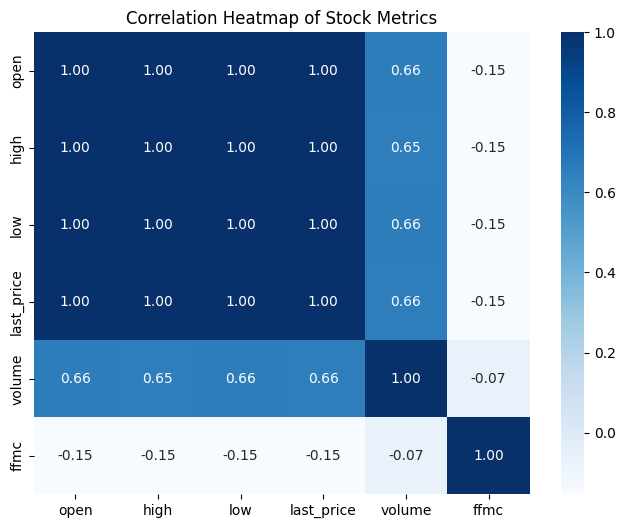

In [56]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[["open","high","low","last_price","volume","ffmc"]].corr(),
            annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Stock Metrics")
plt.show()
